# Analysis of IMDB Rating and Meta Rating of top 1000 IMDB movies


What is IMDB rating:-

MDb registered users can cast a vote (from 1 to 10) on every released title in the database. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page.

What is Meta rating:-

Metacritic is a website that aggregates reviews of films, TV shows, music albums, video games and formerly, books. For each product, the scores from each review are averaged.


# Scope :- To clean and analyse top 1000 IMDB dataset to answer the following questions:-

1) What era was the most number of top 1000 IMDB movies released ?

2) What is the top rated Genre?

3) Does movie certificates play a role in overall ratings of the movie?

4) Creating a new metrix to determine the top 10 movies which includes both Meta and IMDb ratings

5) Who is the best director ?

6) Does movie released date play a role in overall ratings of the movie?

7) What is the average movie duration ?

8) Is there a correlation between IMDB ratings, Meta rating and total rating?

9) Try to answer how to increase the chances of producing a movie that will inturn have a high Meta and IMDB rating.



In [1]:
import pandas as pd
from pandas import Series,DataFrame
import os
working_dictionery = os.getcwd()
path = working_dictionery + '/My Python Stuff/imdb_top_1000.csv'
imdb = pd.read_csv(path)

# Importing the data file

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame

#Importing the libraries

In [3]:

imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Lets start the cleaning process by removing Poster Link, Overview,Star1,Star2,Star3,Star4 as we will not be needing them for analysis. 

In [8]:
imdb1 = imdb.drop(columns=['Poster_Link','Overview','Star1','Star2','Star3','Star4'])#Removing the Columbs

In [9]:
imdb1.head()#Looks Cleaner

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


In [7]:
imdb1.info()# Looking at the Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


We can observe from here that Columbs- Certificate and Meta_Score has Null values.The first step we will be doing is to change Released Year to Integer for analysis.

While changing Released Year to an integer Data type we got an error message that the column contained a row with 'PG' in it. Lets further investigate.

In [10]:
imdb1.loc[imdb.Released_Year == 'PG',['Released_Year','Genre','Series_Title']] 
# to see which row contains PG in Released Year Column

,Released_Year,Genre,Series_Title
966,PG,"Adventure, Drama, History",Apollo 13


Apon further Investigation we found out that the column Apollo 13 had Released Year indecated as 'PG'. Lets change it to 1995- the year Apollo 13 movie was released.


In [11]:
imdb1['Released_Year']=imdb1['Released_Year'].replace(to_replace='PG',value=1995)
# Changing the Released year to 1995.

In [12]:
imdb1['Released_Year'] = imdb1['Released_Year'].apply(int)
#Changing the data type to integers

In [13]:
imdb1.info()
#Perfect we have successfully changed the data type to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [15]:
def Released_Group(Year):
    Released_Year = Year
    
    if Year >= 2000:
        return 'After 2000'
    
    elif Year in range (1980,2000):
        return '1980-2000'
    
    else:
        return 'Before 1980'
    
    # segregating Year to 3 catagories

In [16]:
imdb1['Released Group'] = imdb1['Released_Year'].apply(Released_Group)

# adding it into the existing Data

In [17]:
imdb1.head()

# Perfect we have the new Column Released Group

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Released Group
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469",1980-2000
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411",Before 1980
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444",After 2000
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000",Before 1980
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000",Before 1980


[Text(0.5, 1.0, 'Number of movies in each group')]

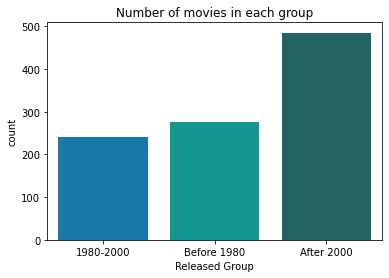

In [20]:
AB = sns.countplot(x= 'Released Group', data= imdb1, palette='winter_d')

AB.set(title = 'Number of movies in each group')

Here we can observe that majority of the movies which are in IMDB top 1000 list were made after 2000.

As Genre are in pairs, lets spit to find out what is the most prefered Genre

In [21]:
Genre = imdb['Genre'].str.split(', ')
#Spliting by comma separation - important to leave a space after the comma as seen in Data.

Genre_data = DataFrame(Genre) 
#Creating a Dataframe

Genre_Data_split = Genre_data.explode(column= 'Genre')
#to transform columns into rows

Genre_Data_split['Genre'].value_counts()
#Total count of each Genre

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Genre')

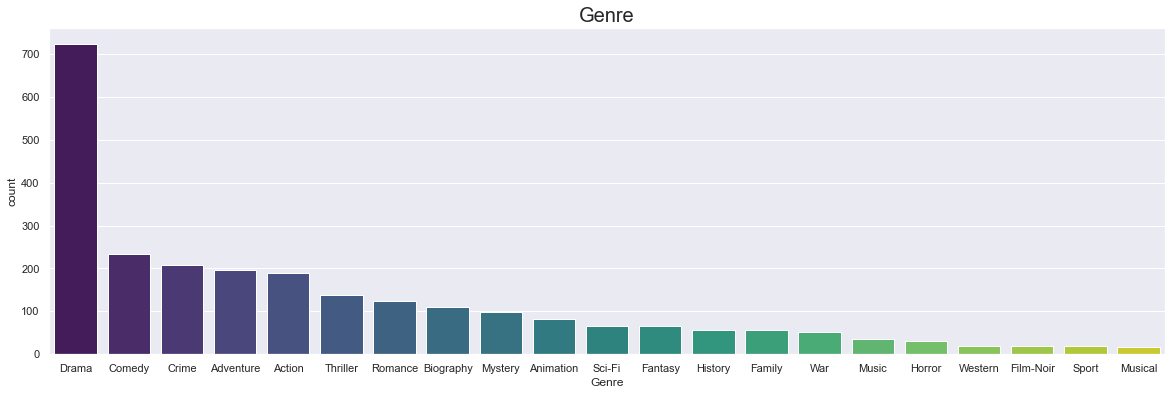

In [22]:
sns.set(rc={"figure.figsize":(20, 6)})

sns.countplot(x = 'Genre',data=Genre_Data_split,
              order = Genre_Data_split['Genre'].value_counts().index, palette='viridis')

plt.title('Genre', size = 20)

# Creating a count plot with Seaborn

From the Barchart we can come to the conclusion that, Drama is the most common Genre within top 1000 IMDB movies.

Lets look into the Certificate Column

In [23]:
imdb1['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

Here we can see that there are 16 diffrent types of movie certificates because in diffrent countries they follow diffrent certificate metrix, lets clean the data in order to better understad it.

Lets Group them into 4 Certifate categories:-

U,UA,A,R [ As per Canada Movie Association]


In [24]:
imdb1['Certificate']=imdb1['Certificate'].replace(to_replace=['PG-13','PG','TV-PG','GP','TV-14','16','TV-MA','U/A']
                                                  ,value=['UA','UA','UA','UA','UA','UA','UA','UA','UA'])

# During futher research, It was found that PG13,PG,TVPG,GP,TV14,UA came under UA catergory.

imdb1['Certificate']=imdb1['Certificate'].replace(to_replace=['Passed','Approved','Unrated']
                                                  ,value=['U','U','U'])
#It was found that Passed,Approved,Unrated came under U catergory.

imdb1['Certificate']=imdb1['Certificate'].replace(to_replace='G'
                                                  ,value='R')
#It was found that G came under R catergory.

imdb1['Certificate'].fillna(value='UA', inplace=True)

#After reserching the null values came under UA category, as these movies where made before there was a set certificate criteria.

In [26]:
imdb1['Certificate'].value_counts()

UA    365
U     280
A     197
R     158
Name: Certificate, dtype: int64

We have Sucessfully cleaned the data into 4 categories.



Text(0.5, 1.0, 'Meta Score by Certificates- KPI')

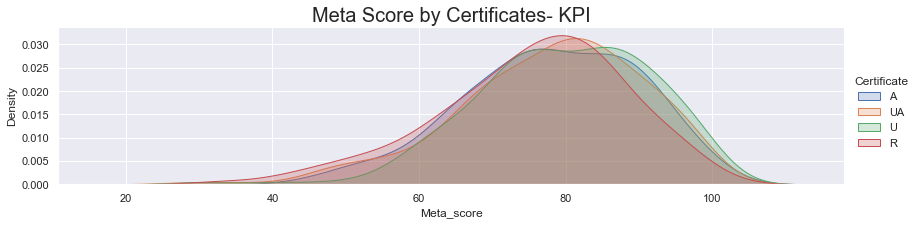

In [28]:
fig = sns.FacetGrid(imdb1,hue = 'Certificate', aspect = 4)
fig.map(sns.kdeplot,'Meta_score', shade = True)


fig.add_legend()

plt.title('Meta Score by Certificates- KPI', size = 20)

#Ploting a KDE plot to understand if Movie Certificate plays a role in Meta Score.

From the analysis, We can see that R rated movies have lower Meta Rating compared to other Certificates. Whereas U has the higest Meta rating

As we have 2 Metrix to determine the top 1000 movies, lets combine the 2 metrix to form a new metrix.

In [29]:
meta1 = imdb1['Meta_score']/10
# Dividing Meta rating by 10 so that we have a rating out of 10 to match with IMBD rating.

imdb1['meta1_data'] = DataFrame(meta1)
#Converting it to a dataframe

imdb1['total']= imdb1['IMDB_Rating']/2 + imdb1['meta1_data']/2
#Adding a new column

imdb1.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Released Group,meta1_data,total
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469",1980-2000,8.0,8.65
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411",Before 1980,10.0,9.60
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444",After 2000,8.4,8.70
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000",Before 1980,9.0,9.00
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000",Before 1980,9.6,9.30


In [30]:
imdb1.nlargest(n= 10, columns='total')

#Finding the top 10 movies according to the new metrix we created.

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Released Group,meta1_data,total
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411",Before 1980,10.0,9.60
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000",Before 1980,9.6,9.30
50,Casablanca,1942,U,102 min,"Drama, Romance, War",8.5,100.0,Michael Curtiz,522093,"1,024,560",Before 1980,10.0,9.25
31,Shichinin no samurai,1954,U,207 min,"Action, Adventure, Drama",8.6,98.0,Akira Kurosawa,315744,"269,061",Before 1980,9.8,9.20
52,City Lights,1931,R,87 min,"Comedy, Drama, Romance",8.5,99.0,Charles Chaplin,167839,"19,181",Before 1980,9.9,9.20
81,Rear Window,1954,U,112 min,"Mystery, Thriller",8.4,100.0,Alfred Hitchcock,444074,"36,764,313",Before 1980,10.0,9.20
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,1642758,"377,845,905",After 2000,9.4,9.15
6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,94.0,Quentin Tarantino,1826188,"107,928,762",1980-2000,9.4,9.15
7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,94.0,Steven Spielberg,1213505,"96,898,818",1980-2000,9.4,9.15
116,Lawrence of Arabia,1962,U,228 min,"Adventure, Biography, Drama",8.3,100.0,David Lean,268085,"44,824,144",Before 1980,10.0,9.15


Here we can observe the top 10 movies formulated from our new total metrix. 

It is astonishing to see that Casablance which is the 50th best IMDB movie is now at number 3 with our new metrix.

In [31]:
imdb1['Director'].value_counts().head(10)

# Finding if there are Directors who made multiple movies in the top 1000 IMDB list

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: Director, dtype: int64

Here We can see the top 10 Director who made multiple movies in the top 1000 IMDB movies.

Now lets try to find the best director by combining this with our total rating metrix.

In [32]:
Best_director = imdb1.groupby("Director")["total"].sum()
#Grouping by the Director and corresponding total's sum

Best_director.nlargest(n= 10).head(10)
# finding the top 10

Director
Alfred Hitchcock     119.55
Steven Spielberg     104.55
Hayao Miyazaki        89.50
Martin Scorsese       82.15
Stanley Kubrick       74.90
Christopher Nolan     64.85
Woody Allen           64.15
Quentin Tarantino     64.00
Clint Eastwood        62.50
David Fincher         61.40
Name: total, dtype: float64

Here We have the top 10 Directors.


Text(0.5, 1.0, 'Box plot of Released Group to Total Rating')

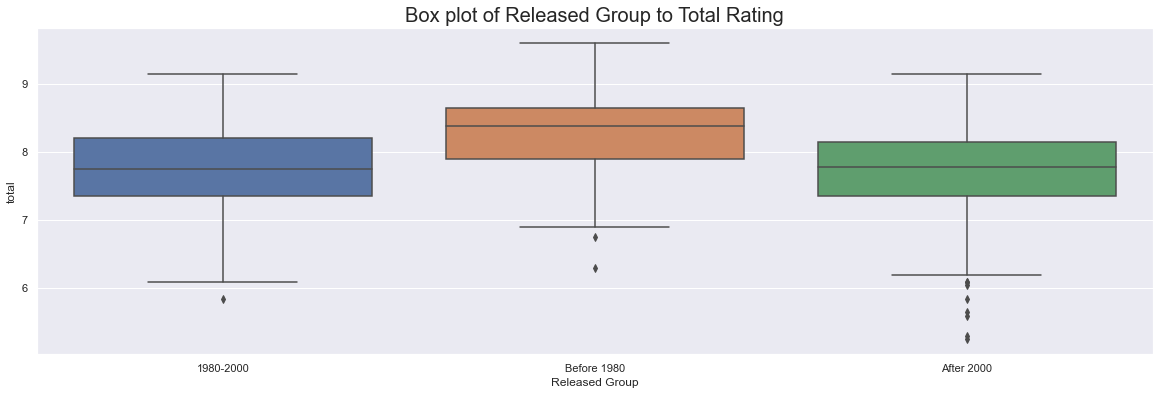

In [35]:
sns.boxplot(x ='Released Group', y='total', data=imdb1 )
#ploting Released group to total rating

plt.title( 'Box plot of Released Group to Total Rating', size = 20)

The middle like of box plot represents the Median value, the top most and bottom most line represents the upper limit and teh lower limit. The inner 2 lines represnt the 1st 1st quartile.

Here we can observe that movies before 1980 had the largest median, upper and lower limit, Whereas After 2000 has the lowest.

In [36]:
# We will be looking at the Duration of the movies.
#To manipulate the data we will first have to convert Duration column to an int.

Times = []

for time in imdb1.Runtime:
    Times.append(time[:3])
    
# creating a forloop to take out just the first 3 objects(in this case numbers) from the duration column    
    
time_1 = DataFrame(Times)  
#creating a Dataframe


time_1.columns = ['Time']
#naming the column


time_1['Time'] = time_1['Time'].apply(int)
#converting it into int

Text(0.5, 1.0, 'Duration chart of the top 1000 IMDB movies')

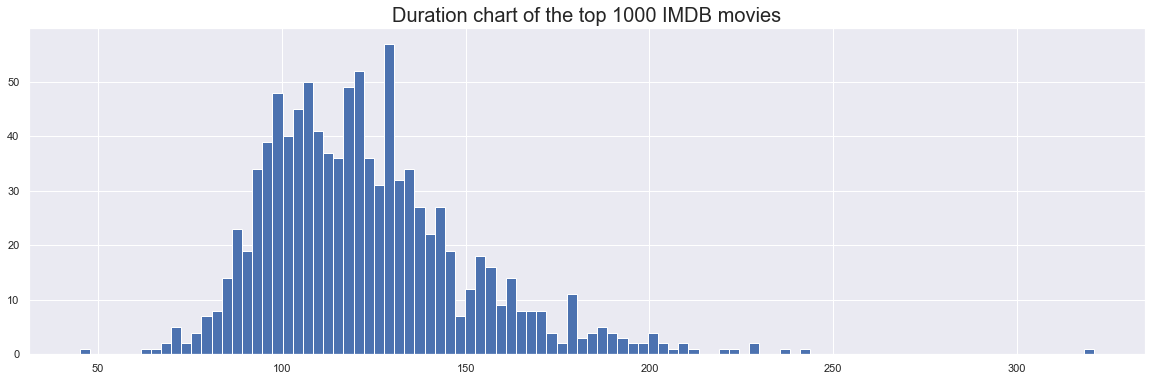

In [38]:
time_1['Time'].hist(bins=100)

plt.title('Duration chart of the top 1000 IMDB movies', size = 20)

Here we can observe that almost 70% of the movies are between 100 and 150 min long.

In [40]:
# we will now look at the corelation between IMDB ratings, Meta rating and also our formulated total rating

imdb2 = imdb1.drop(columns=['Series_Title','Released_Year','Certificate','Runtime','Genre','Meta_score','Director',
                           'No_of_Votes', 'Gross','Released Group'])
#creating a new dataframe with just IMDB ratings, Meta rating and total rating

In [41]:
imdb2.head()

#perfect, we got a new dataframe with just IMDB ratings, Meta rating and total rating

,IMDB_Rating,meta1_data,total
0,9.3,8.0,8.65
1,9.2,10.0,9.60
2,9.0,8.4,8.70
3,9.0,9.0,9.00
4,9.0,9.6,9.30


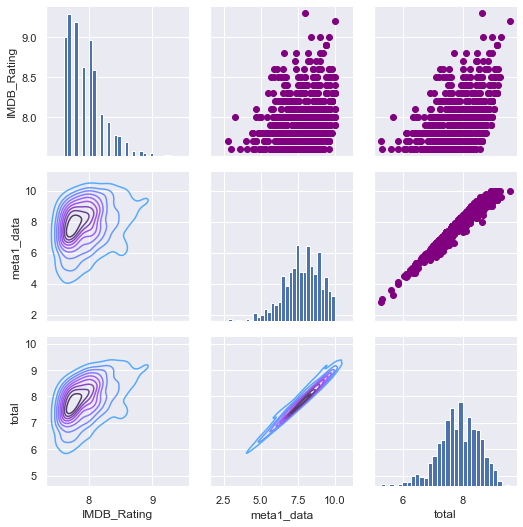

In [44]:
 return_fig = sns.PairGrid(imdb2.dropna())
    
return_fig.map_upper(plt.scatter,color = 'purple')

return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

return_fig.map_diag(plt.hist,bins= 30)

# creating corelation chart using Pairgrid

Here we can observe that meta rating and our total rating are posatively corelated. 

IMBD and total and also IMDB and Meta are not that powerfully corelated.

 # conclusion


1) Majority of the movies which are in IMDB top 1000 list were made after 2000.

2) Drama is the most common Genre within top 1000 IMDB movies.

3) certificates does play a role in overall ratings of the movie, R rated movies have lower Meta Rating compared to other Certificates. Whereas U has the higest Meta rating

4) After creating the new metrix we can observe that The Godfather, 12 Angry Men, Casablanca are the top 3 movies.

5) The top 3 directors are Alfred Hitchcock, Steven Spielberg, Hayao Miyazaki.

6) movies before 1980 had the highest median total rating, Whereas After 2000 has the lowest Median total rating.

7) Average movie duration when compared to the top 1000 IMDB movies are 100-150min.

8) Meta rating and the total rating are posatively corelated. Whereas IMBD and total and also IMDB and Meta are not that powerfully corelated.

9) After analysing the data, the best formula to increase the chances to obtain a higher Meta and IMDB rating is:-
   
   @ producing a movie with Drama+Comedy Genre with U certificate and movie duration between 100-150 min.
   